# Introduction
If we say which disease is the top for causing the death globally then stroke will be in the second position. Approximately 11% of total deaths are resposible for stroke disease according to the World Health Organization(WHO). In our project, we will predict that one having any likely to get stroke or not based on different type of features like gender, age, various diseases, and smoking status.

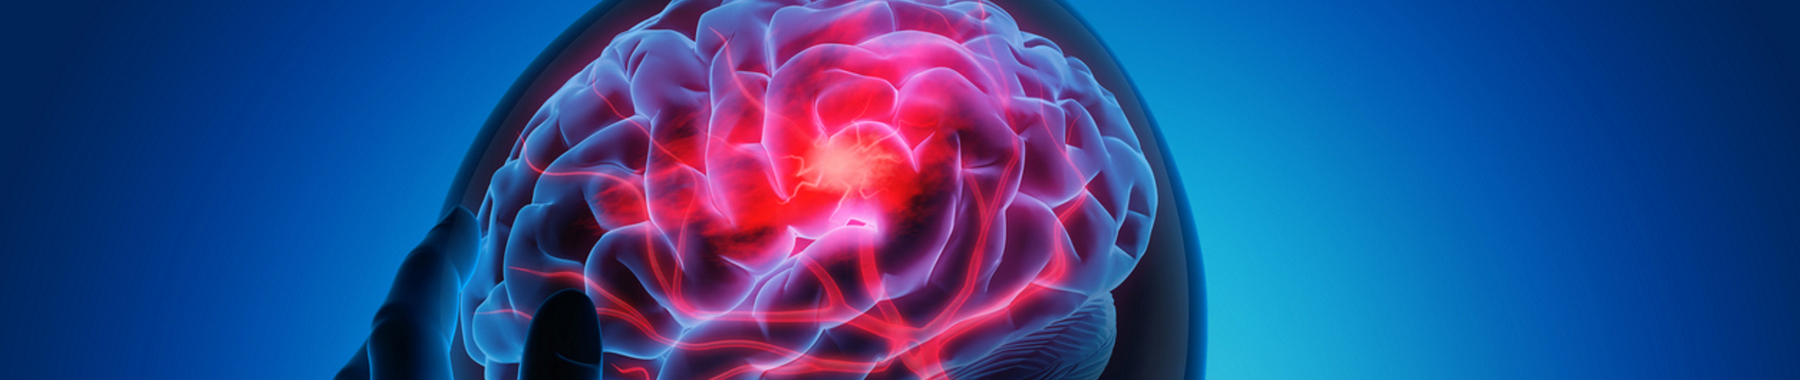

<b>Dataset Discription: </b> Dataset is collected from a popular site that people are known as home of data science which is kaggle and link is https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. <br>

<b> Attribute Information: </b> <br>
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>



#Method
We have used different types of method in our project. In this section, I will discuss the methods that I have used.<br>
<ol>
<li>Exploratory Data Analysis</li>
<li>Cleaning & Processing the Data</li>
<li>Model Training</li>
<li>Model Evaluation</li>

</ol>

## Exploratory Data Analysis
In this part, We will see how is our data and how it is looking with ploting. Also, we will analysis our data.

In [141]:
#importing the neccesary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [142]:
#load the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In the data, we see that we have some categorical data and some are interger and float. We have total 5110 observations. Now we will check the number of null value in each column in our dataset using isnull method

In [143]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

we, see that we have only one column that having 201 null value among 5110 data

In [144]:
#statistival view of dataset
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

checking the object type data

In [145]:
#description of data object columns
df.select_dtypes(include=['object']).describe()

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

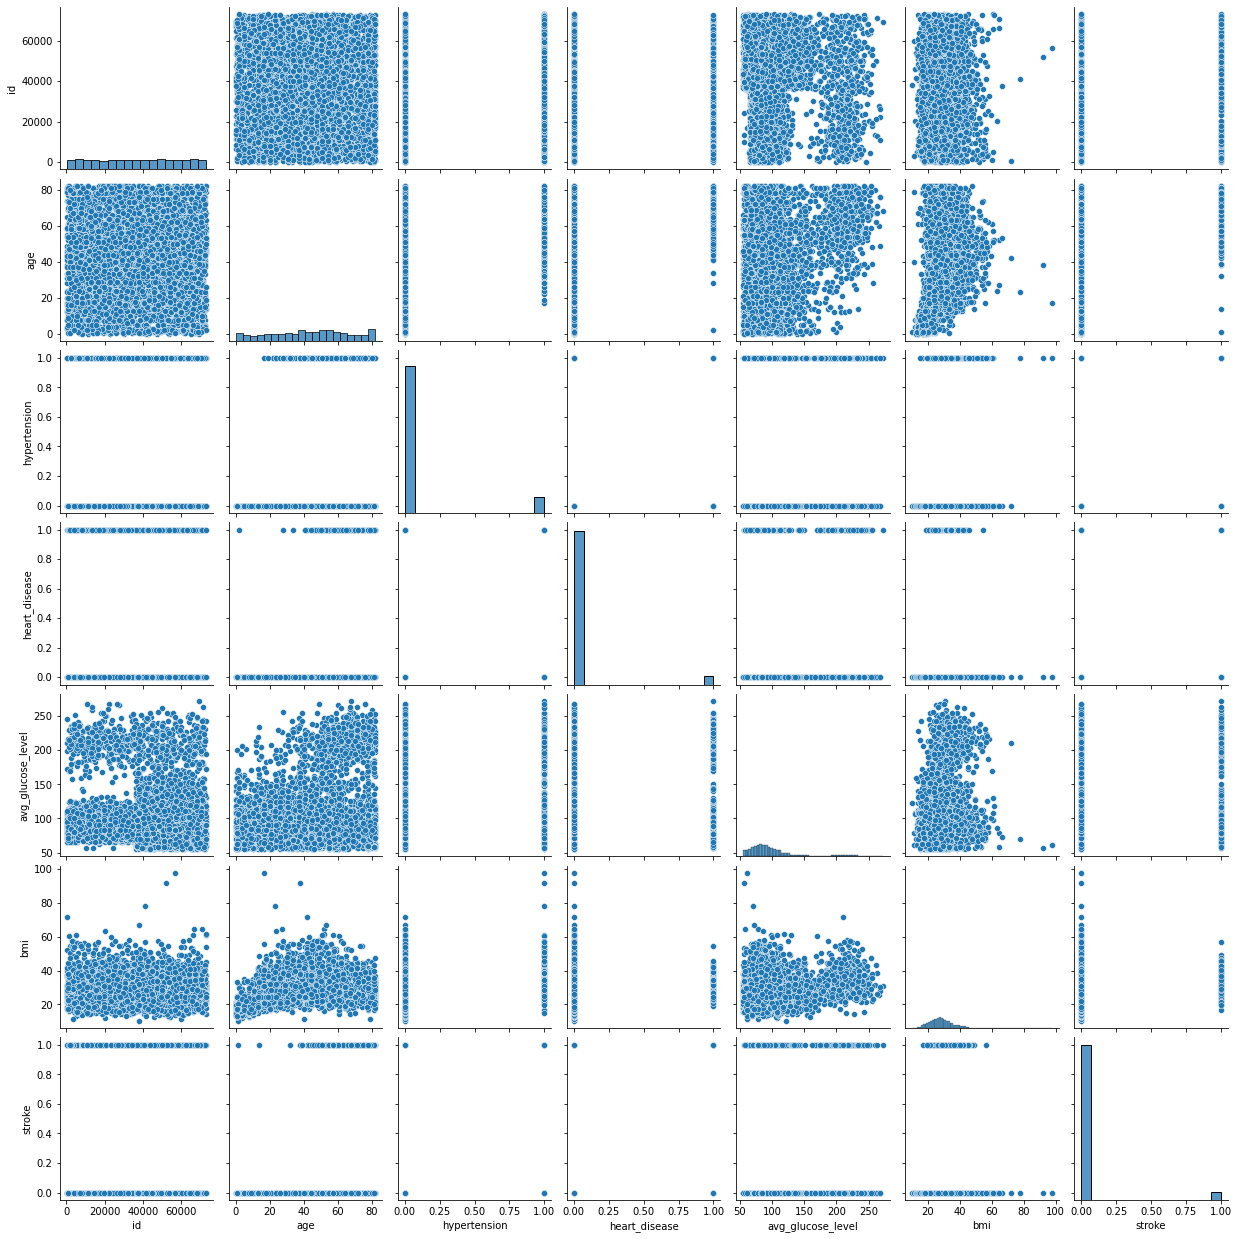

In [146]:
sns.pairplot(df)

In the pairplot, we can see that there are some constant relationships among the other columns like bmi with hypersention.

In [147]:
# age distribution among classes

In [148]:
def age_range(age):
    if   age >= 0 and age <= 20:
        return "0 to 20"
    elif age > 20 and age <= 40:
        return "20 to 40"
    elif age > 40 and age <= 50:
        return "40 to 50"
    elif age > 50 and age <= 60:
        return "50 to 60"
    elif age > 60:
        return "60+"
newdf = df #this is just copy for data visualization, so that data does not modify
newdf['age group'] = newdf['age'].apply(age_range)
newdf.sort_values('age group', inplace = True)

import plotly.graph_objects as gob
labels = newdf['age group'].value_counts().index
values = newdf['age group'].value_counts()
fig = gob.Figure(data = [gob.Pie(labels = labels,values = values,hole = .5)])
fig.update_layout(title_text = 'Age group distributions')
fig.show()

In [149]:
# now we will the Gender distribution of the dataset

labels = newdf['gender'].value_counts().index
values = newdf['gender'].value_counts()
fig = gob.Figure(data = [gob.Pie(labels = labels,values = values,hole = .5)])
fig.update_layout(title_text = 'Gender group distributions')
fig.show()

In [150]:
# now we will see the hypertension distribution of the dataset

labels = newdf['hypertension'].value_counts().index
values = newdf['hypertension'].value_counts()
fig = gob.Figure(data = [gob.Pie(labels = labels,values = values,hole = .5)])
fig.update_layout(title_text = 'Hypertension group distributions')
fig.show()

In [151]:
# now we will see the heart_disease distribution of the dataset

labels = newdf['heart_disease'].value_counts().index
values = newdf['heart_disease'].value_counts()
fig = gob.Figure(data = [gob.Pie(labels = labels,values = values,hole = .5)])
fig.update_layout(title_text = 'heart_disease group distributions')
fig.show()

In [152]:
# now we will see the ever_married distribution of the dataset

labels = newdf['ever_married'].value_counts().index
values = newdf['ever_married'].value_counts()
fig = gob.Figure(data = [gob.Pie(labels = labels,values = values,hole = .5)])
fig.update_layout(title_text = 'ever_married group distributions')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



Text(0.5, 1.0, 'density of bmi')

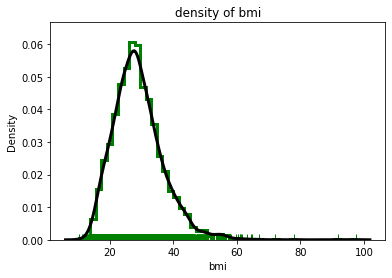

In [153]:
# this is the distribution of bmi in the dataset
ax = sns.distplot(df['bmi'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.title('density of bmi')

In [154]:
# now we will see the work_type distribution of the dataset

labels = newdf['work_type'].value_counts().index
values = newdf['work_type'].value_counts()
fig = gob.Figure(data = [gob.Pie(labels = labels,values = values,hole = .5)])
fig.update_layout(title_text = 'work type group distributions')
fig.show()

In [155]:
# now we will see the Residence_type distribution of the dataset

labels = newdf['Residence_type'].value_counts().index
values = newdf['Residence_type'].value_counts()
fig = gob.Figure(data = [gob.Pie(labels = labels,values = values,hole = .5)])
fig.update_layout(title_text = 'Residence type group distributions')
fig.show()

In [156]:
# now we will see the smoking_status distribution of the dataset
labels = newdf['smoking_status'].value_counts().index
values = newdf['smoking_status'].value_counts()
fig = gob.Figure(data = [gob.Pie(labels = labels,values = values,hole = .5)])
fig.update_layout(title_text = 'smoking status  group distributions')
fig.show()

In [157]:
# now we will see the stroke distribution of the dataset
labels = newdf['stroke'].value_counts().index
values = newdf['stroke'].value_counts()
fig = gob.Figure(data = [gob.Pie(labels = labels,values = values,hole = .5)])
fig.update_layout(title_text = 'stroke  group distributions')
fig.show()

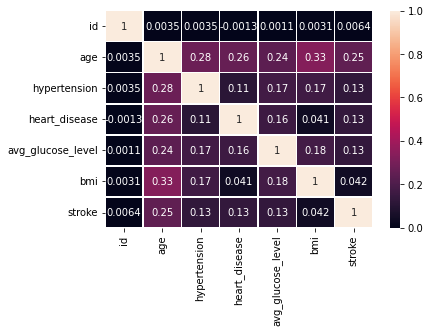

In [158]:
#viewing the correlation among the attributes
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In the correlation map it's looking that there is no highly correlated value.

##Cleaning and Processing the data
<b>Missing value handle: </b> we will have some missing value in bmi that we have seen in the above. we need to handle this. We will handle this using mean value of the data

In [159]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
# checking that is there any null value or not
df['bmi'].isnull().sum()

0

<b>Handaling the object or categorical data: </b> We are now processing the cateforical attributes. We are using label encoder method.

In [160]:
import sklearn
object_col = ["gender", "ever_married" ,"Residence_type","work_type","smoking_status","age group"]
label_encoder = sklearn.preprocessing.LabelEncoder()
for col in object_col:
    df[col]=  label_encoder.fit_transform(df[col])

<b>Features selection: </b> We are taking all attributes without Id as id is only for uniquely identification.

In [161]:
df = df.drop(columns=['id'])
#we are dividing our target variable and features
X = df.drop(columns=['stroke'])
y = df['stroke']

<b>Handeling imbalance dataset: </b> As we see that our dataset is imbalance and we will using random sampling for balance our dataset

In [162]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
X, y = sampler.fit_resample(X,y)

<b>Split dataset: </b> We are going to split our dataset into training and testing.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 2554 to 0
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
 11  age group          5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 519.0 KB


##Model Training
We are now going to train our model using different types of machine learning algorithms like random forest, decision tree, naive bayes, knn, svm

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#define the model
model1_rf = RandomForestClassifier()
model2_dt = DecisionTreeClassifier()
model3_nb = GaussianNB()
model4_knn = KNeighborsClassifier()
model5_svm = SVC()
# fiting the model
model1_rf.fit(X_train,y_train)
model2_dt.fit(X_train,y_train)
model3_nb.fit(X_train,y_train)
model4_knn.fit(X_train,y_train)
model5_svm.fit(X_train,y_train)
#model prediction
model1_rf_prediction = model1_rf.predict(X_test)
model2_dt_prediction = model2_dt.predict(X_test)
model3_nb_prediction = model3_nb.predict(X_test)
model4_knn_prediction = model4_knn.predict(X_test)
model5_svm_prediction = model5_svm.predict(X_test)

##Model Evaluation
We are going to evaluate our model using different matrics


In [166]:
#accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("Random forest accuracy :",accuracy_score(y_test,model1_rf_prediction))
print("Decision tree accuracy :",accuracy_score(y_test,model2_dt_prediction))
print("naive bayes accuracy :",accuracy_score(y_test,model3_nb_prediction))
print("Knn accuracy :",accuracy_score(y_test,model4_knn_prediction))
print("SVM accuracy :",accuracy_score(y_test,model5_svm_prediction))


Random forest accuracy : 0.9934864586904354
Decision tree accuracy : 0.9712032910524512
naive bayes accuracy : 0.7723688721288996
Knn accuracy : 0.9331504970860474
SVM accuracy : 0.7586561535824478


In [167]:
#precision
print("Random forest precision :",precision_score(y_test,model1_rf_prediction))
print("Decision tree precision :",precision_score(y_test,model2_dt_prediction))
print("naive bayes precision :",precision_score(y_test,model3_nb_prediction))
print("Knn precision :",precision_score(y_test,model4_knn_prediction))
print("SVM precision :",precision_score(y_test,model5_svm_prediction))

Random forest precision : 0.9870660313138189
Decision tree precision : 0.9452411994784876
naive bayes precision : 0.7364620938628159
Knn precision : 0.8814589665653495
SVM precision : 0.7453947368421052


#Result

In the evaluation part, we see that our accuracy and precision score is good. We used total 5 model. Among 5 models, most accuracy gained Random forest which is near to 98 percent, second Decision Tree, and so on. But, Naive bayes performs bad in our dataset.

Text(0.5, 1.0, 'confusion metric')

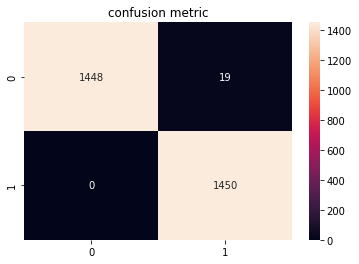

In [168]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,model1_rf_prediction), annot = True, fmt = "d") 
plt.title('confusion metric')

#Conclusion

In our project, I tried to implement some model using various machine learning algorithm. For this dataset, we suggest the random forest model for the best prediction as it gained the higher accuracy and precision. By using this model, we can successfully predict that anyone is likely to stroke or not.

In [ ]:
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Final_PRoject.ipynb'